In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd

# Dados coletados


In [2]:
#Tempo de subida t_r (matrix que acomoda todos os conjuntos de dados em uma única variável)
t_r = []

#Primeiro conjunto de dados (descartar)
#t_r1 = np.array([0.47,1.00,0.59,1.78,0.94,0.75,1.19,0.47]) #s
#t_r.append(t_r1)

#Segundo conjunto de dados (não ionizado)
t_r2 = np.array([3.00,2.81,2.94,3.47,2.82,2.62,3.19,2.97,2.44,1.32,1.75])
t_r.append(t_r2)

#Terceiro conjunto de dados (1 ionização)
t_r3 = np.array([1.03,0.81,1.16,1.38,0.97,1.30,1.15,1.37,2.43,2.19])
t_r.append(t_r3)

#Quarto conjunto de dados (2 ionização)
t_r4 = np.array([1.03,0.81,1.16,1.38,0.97,1.50,1.15,1.37,2.43,2.19])
t_r.append(t_r4)


#Quinto conjunto de dados (nova gota)
t_r5 = np.array([1.28,0.94,0.6,1.84,1.16,1.15,1.09,0.93,1.00,1.00,1.31,1.75])
t_r.append(t_r5)


#Sexto conjunto de dados (nova gota)
t_r6 = np.array([0.75,0.72,1.00,0.57,0.66,0.47,0.56,0.44,0.38,0.65,0.47,0.59])
t_r.append(t_r6)

#Sétimo conjunto de dados (1 ionização)
t_r7 = np.array([0.47,0.37,0.44,0.43,0.53,0.54,0.60,0.69,0.56,0.72])
t_r.append(t_r7)

#Oitavo conjunto de dados (2 ionização)
t_r8 = np.array([0.68,0.56,0.60,0.47,0.53,0.43])
t_r.append(t_r8)



#Tempo de queda (matrix que acomoda todos os conjuntos de dados em uma única variável)
t_f = []

#Primeiro conjunto de dados (descartar, medida errada)
#t_f1 = np.array([0.47,0.47,1.16,0.47,1.09,1.10,0.91,1.18,1.16]) #s
#t_f.append(t_f1)

#Segundo conjunto de dados
t_f2 = np.array([2.28,2.78,2.87,2.67,2.37,2.38,2.46,2.53,2.12,2.97,2.57,2.94])
t_f.append(t_f2)

#Terceiro conjunto (1 ionização)
t_f3 = np.array([2.32,2.50,2.28,2.09,2.22,2.22,2.00,2.40,2.50,2.44])
t_f.append(t_f3)

#Quarto conjunto de dados (2 ionização)
t_f4 = np.array([2.32,2.5,2.28,2.09,2.22,2.22,2.00,2.40,2.50,2.44])
t_f.append(t_f4)

#Quinto conjunto de dados (nova gota)
t_f5 = np.array([3.59,3.81,2.59,2.60,2.28,2.56,4.41,2.18,2.93,3.81,3.38,3.15])
t_f.append(t_f5)

#Sexto conjunto de dados (nova gota)
t_f6 = np.array([4.06,5.47,5.75,9.78,4.25,2.88,2.94,3.67,3.78,4.16,6.03,3.94,3.32,3.75,6.25])
t_f.append(t_f6)

#Sétimo conjunto de dados (1 ionização)
t_f7 = np.array([4.44,4.94,4.78,3.91,3.37,2.03,5.69,3.47,3.97,4.31])
t_f.append(t_f7)

#Oitavo conjunto de dados (2 ionização)
t_f8 = np.array([4.50,4.63,3.84,4.62,6.07,4.06,0.43])
t_f.append(t_f8)


#Separação das placas do capacitor e sua incerteza instrumental:
d = 8.75e-3 #m
sigma_d = 5e-5 #m

#Diferença de potencial aplicada nas placas e incerteza instrumental
delta_V = 301 #V
sigma_V = 0.5 #V


#Os intervalos de tempo foram medidos com um cronômetro de incerteza
sigma_t_inst = 0.005 #s

# Incerteza do tempo

Nós temos uma incerteza instrumental e também estatística no tempo medido. Tendo isto em vista devemos unir as duas da seguinte forma:

$$\sigma_\bar{t} = \sqrt{\sigma_{inst}^2 + \sigma_{est}^2}$$

Onde $\sigma_{est}$ é o desvio padrão da média.

In [3]:
#Incerteza do tempo de queda
sigma_t_f = []

for t in t_f:
    aux = np.sqrt(sigma_t_inst**2 + (np.std(t)/np.sqrt(len(t)-1))**2 )
    aux = float('{:g}'.format(float('{:.2g}'.format(aux))))
    sigma_t_f.append(aux)
print(sigma_t_f)

#Incerteza do tempo de subida
sigma_t_r = []

for t in t_r:
    aux = np.sqrt(sigma_t_inst**2 + (np.std(t)/np.sqrt(len(t)-1))**2 )
    aux = float('{:g}'.format(float('{:.2g}'.format(aux))))
    sigma_t_r.append(aux)
print(sigma_t_r)

[0.079, 0.054, 0.054, 0.2, 0.46, 0.32, 0.66]
[0.19, 0.17, 0.17, 0.1, 0.049, 0.036, 0.037]


# Calculando as velocidades


Seja $x$ o comprimento da menor divisão da grade, então a velocidade da gota pode ser calculculada aproximadamente como:

$$v = \frac{x}{\bar{t}}$$

Onde $\bar{t}$ é o tempo médio

In [4]:
#Tamanho do intervalo da grande:
x = 5e-4/5 #m

#Velocidade de subida
v_r = []
for t in t_r:
    v_r.append(x/np.mean(t)) #m/s

#Velocidade de queda
v_f = []
for t in t_f:
    v_f.append(x/np.mean(t)) #m/s

# Calculando a incerteza das velocidades

A incerteza da velocidade será dada pela seguinte expressão:

$$\sigma_v = \sqrt{\left(\frac{\partial}{\partial \bar{t}}v\right)^2\sigma_\bar{t}^2} = \bigg|\frac{\partial}{\partial \bar{t}}v\bigg|\sigma_\bar{t}$$

Utilizando a expressão de $v$:

$$\sigma_v  = x\bigg|\frac{\partial}{\partial \bar{t}}\frac{1}{\bar{t}}\bigg|\sigma_\bar{t} = \frac{x}{\bar{t}^2}\sigma_{\bar{t}}$$

In [5]:
#Incerteza da velocidade de subida
sigma_v_r = []
for i,t in enumerate(t_r):
    aux = x/(np.mean(t)**2) * sigma_t_r[i]
    aux = float('{:g}'.format(float('{:.2g}'.format(aux))))
    sigma_v_r.append(aux)
print(sigma_v_r)

#Incerteza da velocidade de queda
sigma_v_f = []
for i,t in enumerate(t_f):
    aux = x/(np.mean(t)**2) * sigma_t_f[i]
    aux = float('{:g}'.format(float('{:.2g}'.format(aux))))
    sigma_v_f.append(aux)
print(sigma_v_f)
    

[2.7e-06, 8.9e-06, 8.7e-06, 7.3e-06, 1.3e-05, 1.3e-05, 1.2e-05]
[1.2e-06, 1e-06, 1e-06, 2.1e-06, 2.1e-06, 1.9e-06, 4.1e-06]


# Calculando a carga

$$q = \frac{4}{3}\pi \left[\sqrt{\left(\frac{b}{2p}\right)^2 + \frac{9\eta v_f}{2\rho g}} - \frac{b}{2p}\right]^3 \frac{\rho g d}{V} \frac{(v_f + v_r)}{v_f}$$

In [6]:
# Constantes que utilizaremos:

b = 8.2e-3 #Pa m

#Densidade do óleo
rho = 886 #kg/m^3

#Aceleração da gravidade
g = 9.8 #m/s

#Viscodidade do ar a uma temperatura de aproximadamente 26 graus Celsius
eta = 1.8520e-5 #Nsm^-2

#Pressão barométrica
p = 101325 #Pa


#Calculando a carga com a equação corrigida para a queda com campo elétrico ligado (Ignorar)
#q = 4/3 * np.pi * (np.sqrt((b/(2*p))**2 + 9*eta*np.array(v_f)/(2*rho*g)) - b/(2*p))**3 * rho * g * d/delta_V * (np.array(v_f) - np.array(v_r))/(np.array(v_f) + np.array(v_r)) 

#Calculando a carga uilizando a equação derivada no roteiro
q = []
for i, vf in enumerate(v_f):
    charge = 4/3 * np.pi * (np.sqrt((b/(2*p))**2 + 9*eta*vf/(2*rho*g)) - b/(2*p))**3 * rho * g * d/delta_V * (vf + v_r[i])/(vf)
    q.append(charge)

print('Carga =',q, 'C')



Carga = [3.8719508641984875e-19, 6.310260980409745e-19, 6.253891362005174e-19, 5.331719604341936e-19, 6.575534022435971e-19, 8.08860808414893e-19, 8.05938741480921e-19] C


In [7]:
print(np.array(q)/1.602e-19)
print(q[6] - q[4])

[2.4169481  3.93898938 3.90380235 3.32816455 4.10457804 5.04906872
 5.0308286 ]
1.4838533923732388e-19


# Calculando a incerteza da carga

Propagando a incerteza da velocidade de queda, velocidade de subida, tensão e serparação da placa dos capacitores para a carga:

$$\sigma_q = \sqrt{\left(\frac{\partial q}{\partial v_f}\right)^2\sigma_{v_f}^2 + \left(\frac{\partial q}{\partial v_r}\right)^2\sigma_{v_r}^2 + \left(\frac{\partial q}{\partial V}\right)^2\sigma_{V}^2 + \left(\frac{\partial q}{\partial d}\right)^2\sigma_{d}^2}$$

Utilizando a expressão de $q$ nós obtemos que:

$$\frac{\partial q}{\partial v_f} = \frac{4}{3}\pi\frac{\rho g d}{V}\left[\sqrt{\left(\frac{b}{2p}\right)^2 + \frac{9\eta v_f}{2\rho g}} - \frac{b}{2p}\right]^2\left[\frac{27}{4}\frac{\eta}{\rho g}\frac{1}{\sqrt{\left(\frac{b}{2p}\right)^2 + \frac{9\eta v_f}{2\rho g}}}\frac{(v_f + v_i)}{v_f} - \left(\sqrt{\left(\frac{b}{2p}\right)^2 + \frac{9\eta v_f}{2\rho g}} - \frac{b}{2p}\right) \frac{v_r}{v_f^2} \right]$$

$$\frac{\partial q }{\partial v_r} = \frac{4}{3}\pi \frac{\rho g d}{V}\left[\sqrt{\left(\frac{b}{2p}\right)^2 + \frac{9\eta v_f}{2\rho g}} - \frac{b}{2p}\right]^3 \frac{1}{v_f}$$

$$\frac{\partial q}{\partial V} = -\frac{4}{3}\pi \frac{\rho g d}{V^2}\left[\sqrt{\left(\frac{b}{2p}\right)^2 + \frac{9\eta v_f}{2\rho g}} - \frac{b}{2p}\right]^3\frac{(v_f + v_r)}{v_f}$$

$$\frac{\partial q}{\partial d} = \frac{4}{3}\pi \frac{\rho g }{V}\left[\sqrt{\left(\frac{b}{2p}\right)^2 + \frac{9\eta v_f}{2\rho g}} - \frac{b}{2p}\right]^3\frac{(v_f + v_r)}{v_f}$$


Assim:

$$\sigma_q = q\sqrt{\left[\frac{27}{4}\frac{\eta}{\rho g}\frac{1}{\left(\sqrt{\left(\frac{b}{2p}\right)^2 + \frac{9\eta v_f}{2\rho g}} - \frac{b}{2p}\right)\sqrt{\left(\frac{b}{2p}\right)^2 + \frac{9\eta v_f}{2\rho g}}} -  \frac{v_r}{v_f(v_f + v_r)} \right]^2 \sigma_{v_f}^2 + \left[\frac{\sigma_{v_r}}{(v_f + v_r)}\right]^2 + \left[\frac{\sigma_d}{d}\right]^2 + \left[\frac{\sigma_V}{V}\right]^2}$$

In [8]:
#Devido ao tamanho da expressão, vamos calculá-la em blocos

sigma_q = []

for i,vf in enumerate(v_f):
    #Fazendo os cálculos 
    sqrt = np.sqrt((b/(2*p))**2 + 9*eta*vf/(2*rho*g))
    x_1 = sigma_v_f[i]*(27/4 * eta/(rho * g) * 1/((sqrt - b/(2*p))*sqrt) - v_r[i]/(vf*(vf + v_r[i])))
    x_2 = sigma_v_r[i]/(vf + v_r[i])
    x_3 = sigma_d/d
    x_4 = sigma_V/delta_V
    aux = q[i]*np.sqrt(x_1**2 + x_2**2 + x_3**2 + x_4**2)
    aux = float('{:g}'.format(float('{:.2g}'.format(aux))))
    
    #Armazenando a incerteza para cada valor de carga
    sigma_q.append(aux)
    
print(sigma_q)

[1.9e-20, 5.1e-20, 4.9e-20, 4.5e-20, 6.7e-20, 6.8e-20, 1.1e-19]


In [9]:
drop_colors = ['deepskyblue','deepskyblue','deepskyblue','royalblue', 'slateblue', 'slateblue', 'slateblue']

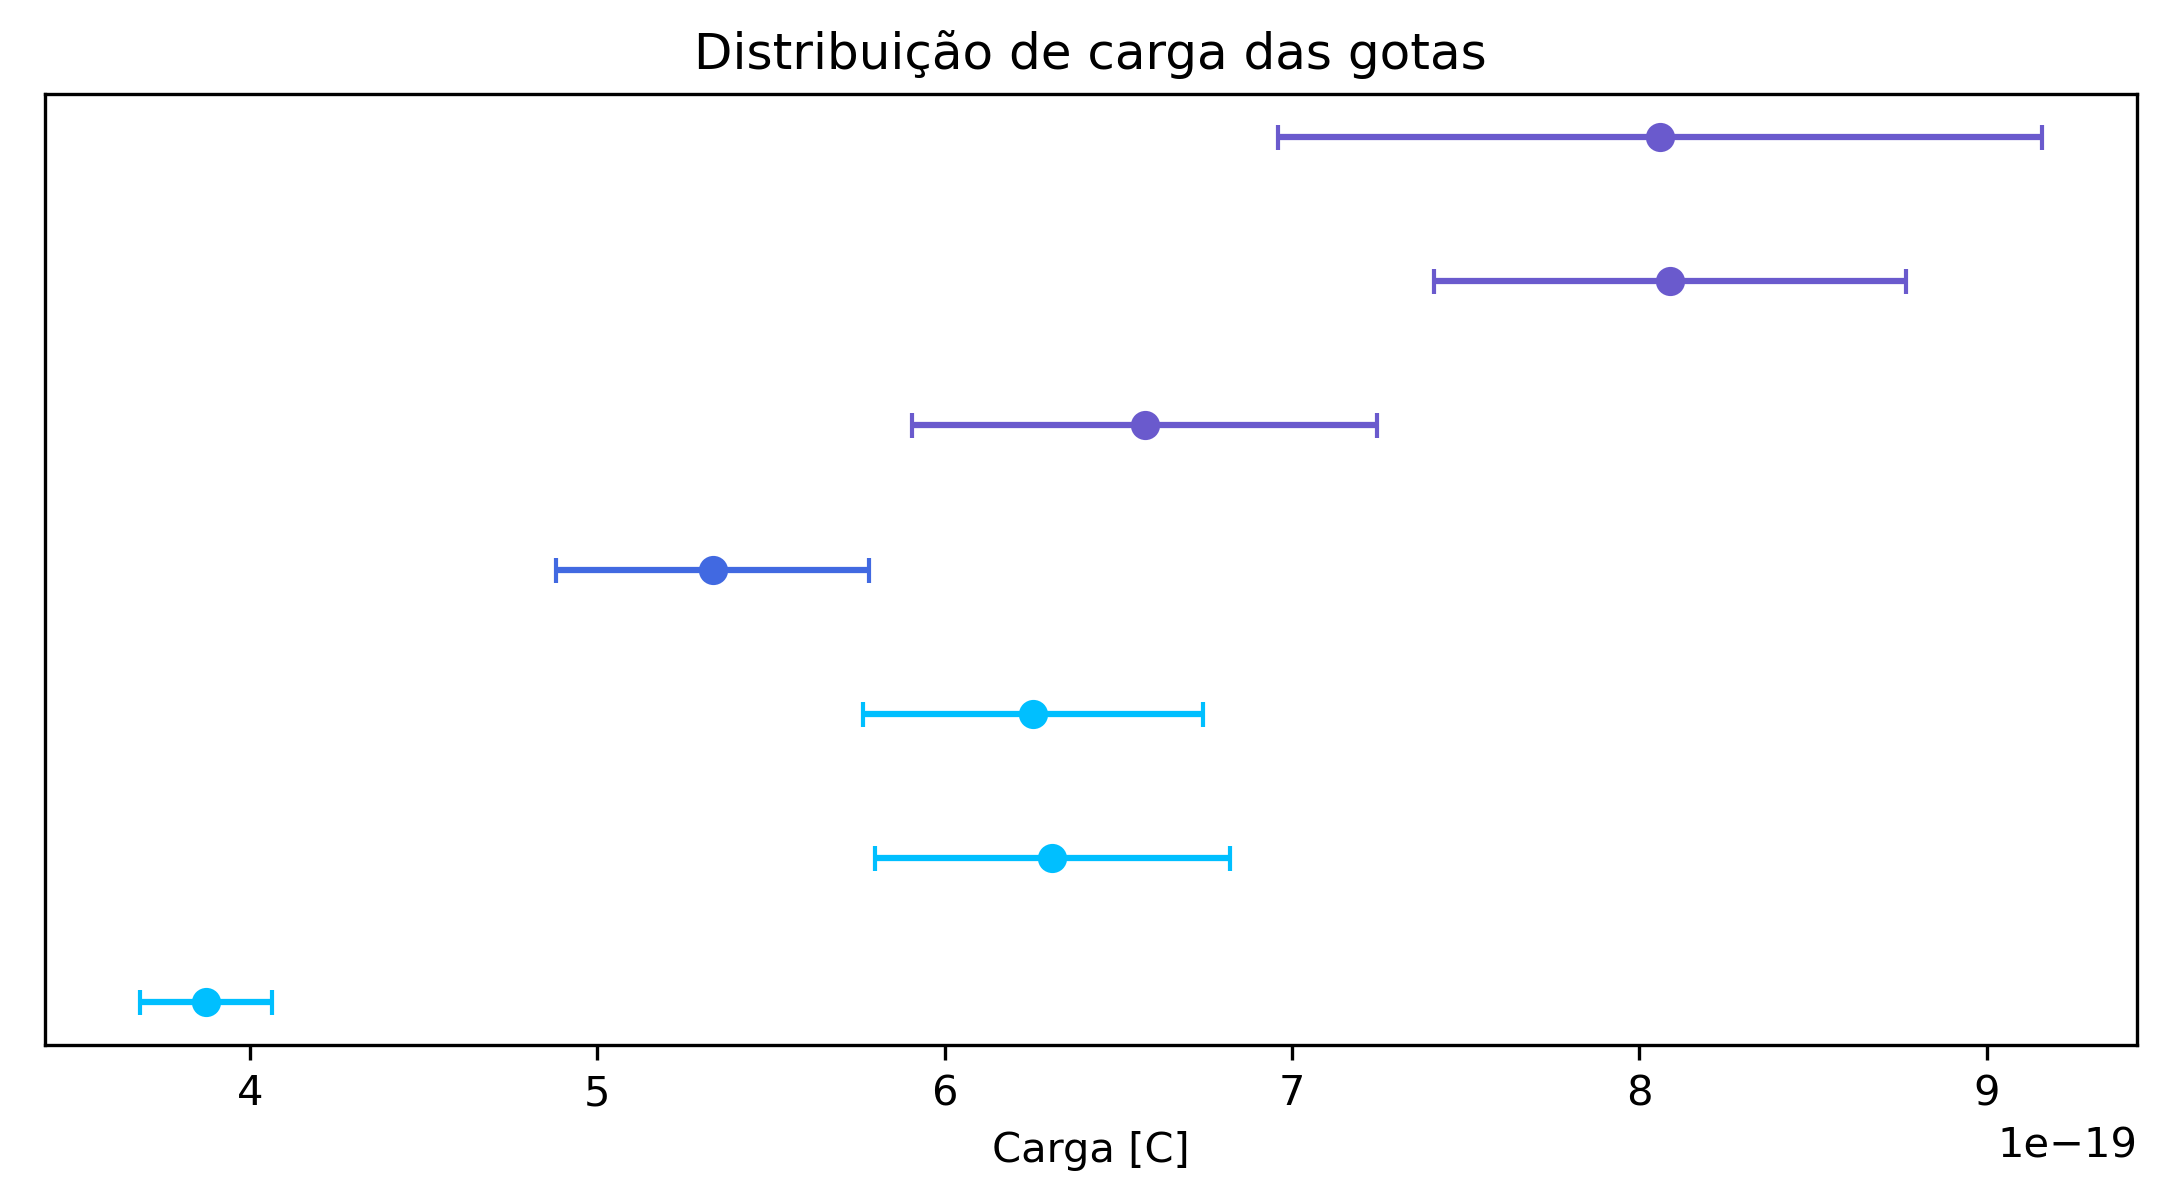

In [10]:
plt.figure(figsize = [9.0,4.2], dpi = 300)
plt.errorbar(q[:3],[1,2,3],0,sigma_q[:3],'o', color = 'deepskyblue', capsize=3)
plt.errorbar(q[3],[4],0,sigma_q[3],'o', color = 'royalblue', capsize=3)
plt.errorbar(q[4:],[5,6,7],0,sigma_q[4:],'o', color = 'slateblue', capsize=3)
plt.yticks([])
#plt.ylim([0.995,1.005])
plt.xlabel(r'Carga [C]')
plt.title('Distribuição de carga das gotas')
#plt.legend()
plt.show()

# Calculando a propagação de incerteza no cálculo de uma média:

Uma média de x_i valores é definida como:

$$\bar{x} = \frac{1}{N}\sum_{i=1}^N x_i$$

Como cada variável possui uma incerteza $\sigma_{x_i}$, essas serão propagadas para a média da seguinte forma:

$$\sigma_{\bar{x}} = \sqrt{\sum_{j=1}^N \left(\frac{\partial \bar{x}}{\partial x_j}\right)^2 \sigma^{2}_{x_j}}$$

Utilizando a definição de média:

$$\sigma_{\bar{x}} = \sqrt{\sum_{j=1}^N\sum_{i=1}^N \left(\frac{1}{N}\frac{\partial x_i}{\partial x_j}\right)^2 \sigma^{2}_{x_j}}$$

Como $\frac{\partial x_i}{\partial x_j} = \delta_{ij}$:

$$\sigma_{\bar{x}} = \sqrt{\sum_{j=1}^N\sum_{i=1}^N \left(\frac{1}{N}\delta_{ij}\right)^2 \sigma^{2}_{x_j}}$$
$$\sigma_{\bar{x}} = \sqrt{\sum_{i=1}^N \left(\frac{1}{N}\right)^2 \sigma^{2}_{x_i}}$$
$$\sigma_{\bar{x}} = \frac{1}{N}\sqrt{\sum_{i=1}^N  \sigma^{2}_{x_i}}$$


In [11]:
#print('unsorted',q)
q = sorted(q)
#print('sorted',q)

#Reorganizando a incerteza após o sort de q:
#sigma_q = [6.3e-21, 1.4e-20, 1.7e-20, 1.7e-20, 2e-20, 4.7e-20, 2.4e-20]
sigma_q = [1.9e-20,4.5e-20,4.9e-20,5.1e-20, 6.7e-20, 1.1e-19, 1.1e-19 ]
[1.9e-20, 5.1e-20, 4.9e-20, 4.5e-20, 6.7e-20, 1.1e-19, 1.1e-19]
#Calculando a carga média dos grupos:
q_group = [q[0],q[1],np.mean(q[2:5]),np.mean(q[5:])]

#Calculando a incerteza dos grupos com mais de uma carga:
sum1 = 0
for c in sigma_q[2:5]:
    sum1 += c**2
sum1 = np.sqrt(sum1)/len(sigma_q[2:5])
#Arredondando para dois algarismos significativos
sum1 = float('{:g}'.format(float('{:.2g}'.format(sum1))))

sum2 = 0
for c in sigma_q[5:]:
    sum2 += c**2
sum2 = np.sqrt(sum2)/len(sigma_q[5:])
#Arredondando para dois algarismos significativos
sum2 = float('{:g}'.format(float('{:.2g}'.format(sum2))))

#Gerando o vetor com a incerteza de cada grupo
sigma_q_group = [sigma_q[0],sigma_q[1],sum1,sum2]

print(sigma_q_group)

[1.9e-20, 4.5e-20, 3.2e-20, 7.8e-20]


In [12]:
print(np.std(q[5:])/(len(q[5:])))

7.305167334930091e-22


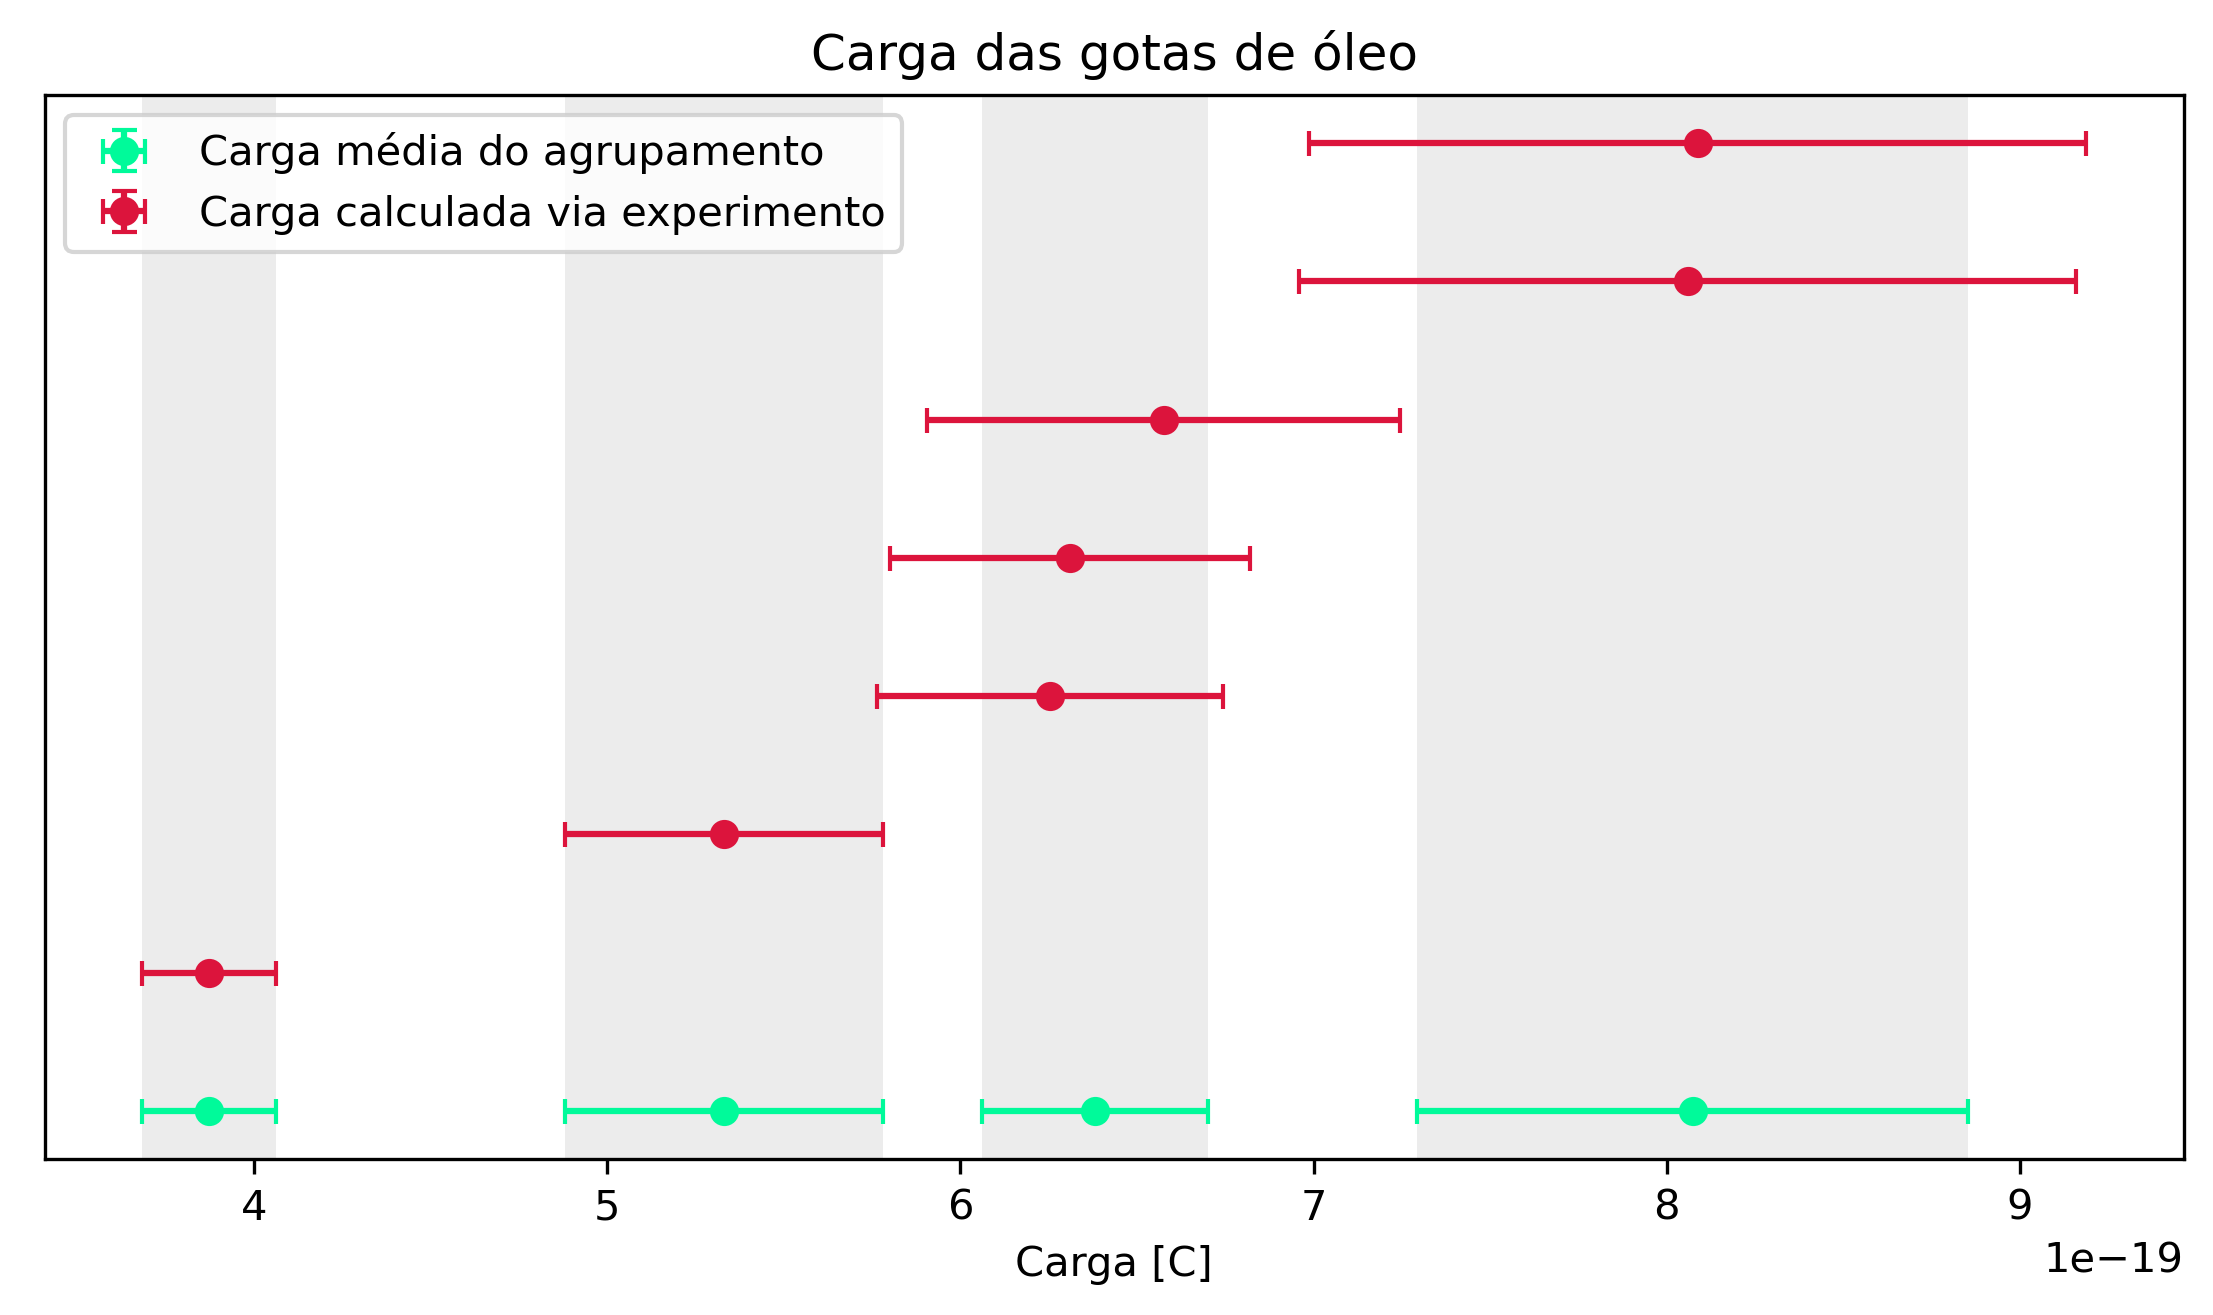

In [16]:
plt.figure(figsize = [9.2,4.7], dpi = 300)
plt.errorbar(q_group,np.full(len(q_group),1),0,sigma_q_group,'o', color = 'Mediumspringgreen', label = 'Carga média do agrupamento', capsize =3)
plt.errorbar(np.array(q),[2,3,4,5,6,7,8],0,sigma_q,'o', color = 'crimson', label = 'Carga calculada via experimento', capsize = 3)
plt.axvspan(q[0] - sigma_q[0], q[0] + sigma_q[0], color='gray', alpha=0.15, lw=0)
plt.axvspan(q[1] - sigma_q[1], q[1] + sigma_q[1], color='gray', alpha=0.15, lw=0)
plt.axvspan(q_group[2] - sigma_q_group[2], q_group[2] + sigma_q_group[2], color='gray', alpha=0.15, lw=0)
plt.axvspan(q_group[3] - sigma_q_group[3], q_group[3] + sigma_q_group[3], color='gray', alpha=0.15, lw=0)
#plt.ylim([0.995,1.015])
plt.yticks([])
plt.xlabel(r'Carga [C]')
plt.title('Carga das gotas de óleo')
plt.legend(loc =2)
plt.show()

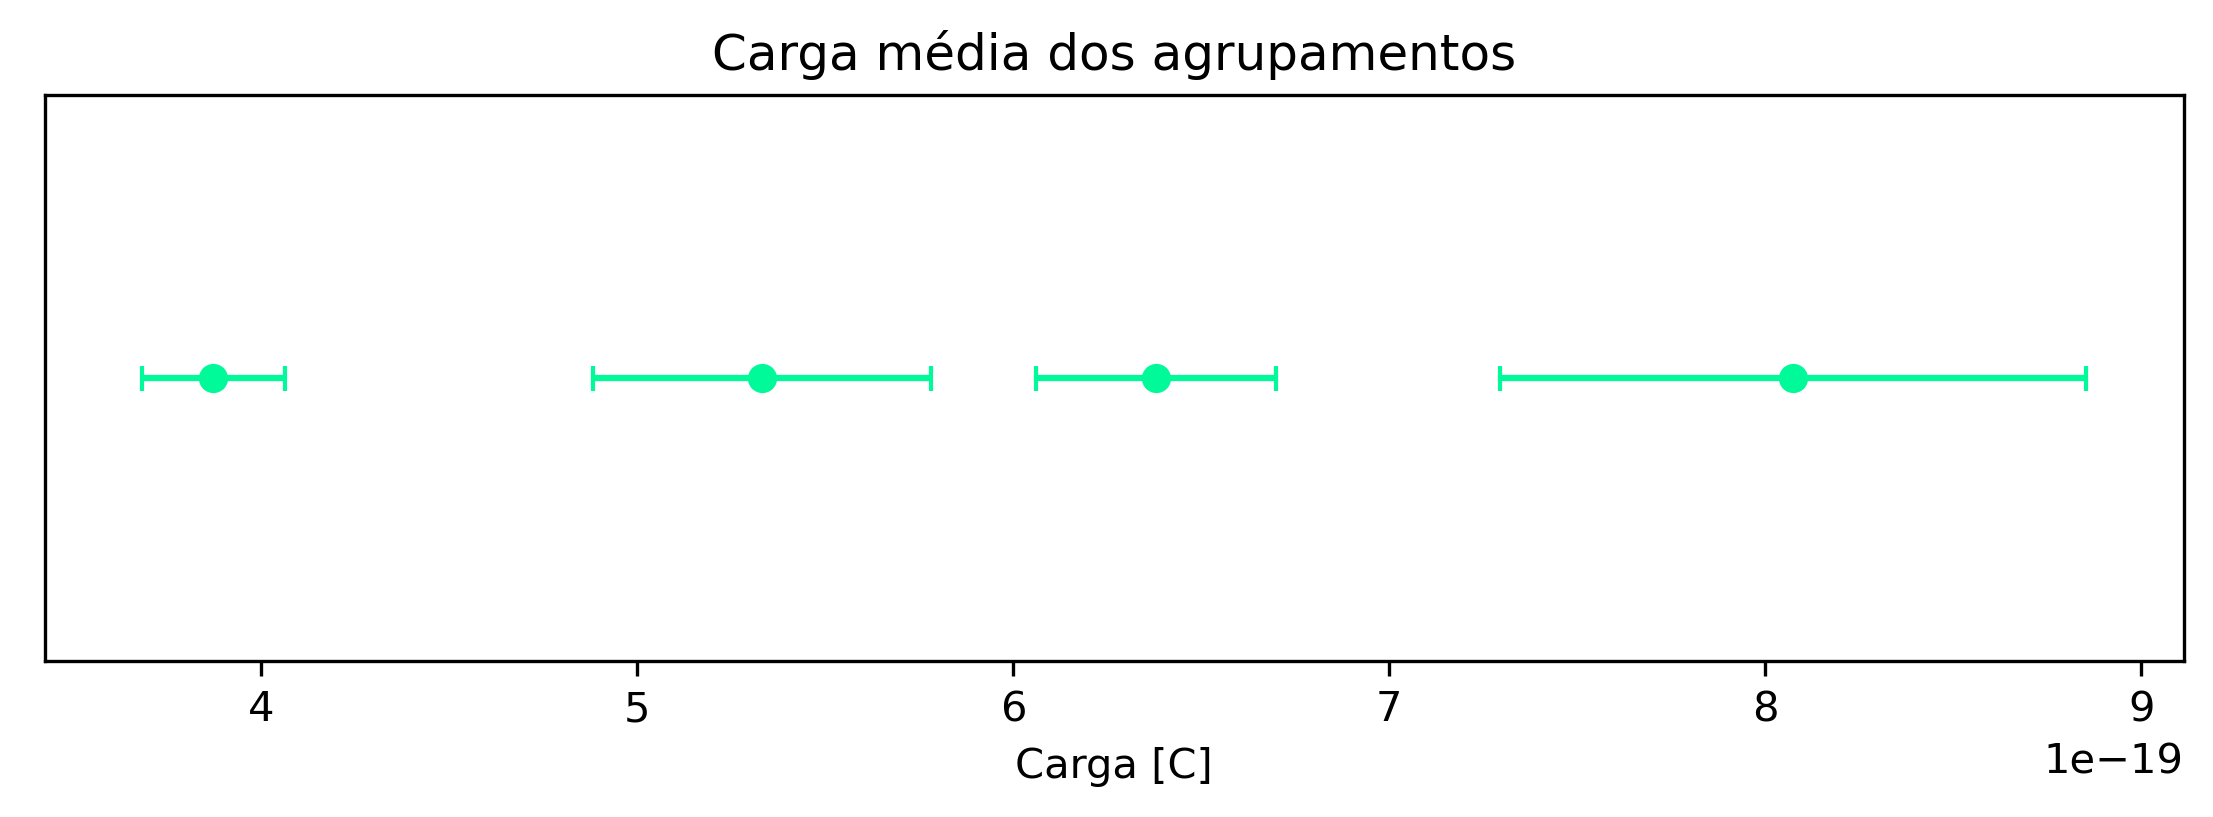

In [14]:
plt.figure(figsize = [9.2,2.5], dpi = 300)
plt.errorbar(q_group,np.full(len(q_group),1),0,sigma_q_group,'o', color = 'Mediumspringgreen', capsize = 3)
#plt.ylim([0.995,1.005])
plt.yticks([])
plt.xlabel(r'Carga [C]')
plt.title('Carga média dos agrupamentos')
#plt.legend()
plt.show()

# Incerteza da diferença de duas grandezas:

Seja $y = \alpha - \beta$, a incerteza de $y$ será dada pela seguinte propagação dos erros de $\alpha$ e $\beta$

$$\sigma_y = \sqrt{\left(\frac{\partial y}{\partial \alpha}\right)^2\sigma_\alpha^2 + \left(\frac{\partial y}{\partial \beta}\right)^2\sigma_\beta^2}$$
$$\sigma_y = \sqrt{\sigma_\alpha^2 + \sigma_\beta^2}$$


In [15]:
#Calculando o tamanho do primeiro espaçamento
q12 = q_group[1] - q_group[0]
sigma_q12 = np.sqrt(sigma_q_group[1]**2 + sigma_q_group[0]**2)

#Calculando o tamanho do segundo espaçamento
q23 = q_group[2] - q_group[1]
sigma_q23 = np.sqrt(sigma_q_group[2]**2 + sigma_q_group[1]**2)

#Calculando o tamanho do terceiro espaçamento
q34 = q_group[3] - q_group[2]
sigma_q34 = np.sqrt(sigma_q_group[3]**2 + sigma_q_group[2]**2)


#A carga elementar é a média do tamanho dos espaçamentos:
q_exp = np.mean([q12,q23,q34])


#Calculando a incerteza desta carga:
sigma_q_exp = np.sqrt(sigma_q12**2 + sigma_q23**2 + sigma_q34**2)/3
#Arredondando para dois algarismo significativos:
sigma_q_exp = float('{:g}'.format(float('{:.2g}'.format(sigma_q_exp))))


print('e = (%.2f +- %.2f) 10^{-19}C' % (q_exp/1e-19,sigma_q_exp/1e-19))

e = (1.40 +- 0.37) 10^{-19}C
